In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [148]:
df = pd.read_csv(r"C:\Users\Ridwan\Desktop\netflix_titles.csv")

In [124]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [125]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [126]:
df.shape

(8807, 12)

## Total Null Values 

In [127]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Percentage of null values

In [128]:
df.isnull().mean() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## Handle missing values 

In [149]:
def mode_imputate(df,variale):
    df[variable].fillna(df[variable].mode()[0],inplace=True)
    df['cast'].fillna('Actor not Specified',inplace=True)
    df['director'].fillna('Director not Specified',inplace=True)


In [150]:
variables = ['country','rating','duration','date_added']

for variable in variables:
    mode_imputate(df,variable)

In [151]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Checking  for duplicate data

In [152]:
df.duplicated().sum()

0

## Now to Visualize Netflix production to get insight from historical data
This to see which Production highly produce more than other over many years back

#### 1. Netflix Produces Movie is tripple high than TV Shows 
#### 2. Many members love Movie than TV Shows


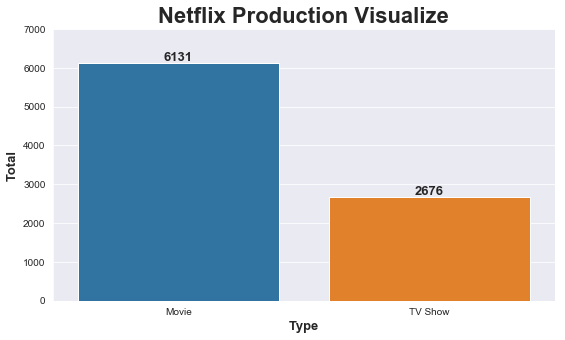

In [133]:
def BarGraphAnnotation(ax):
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(),'.0f'),
                  (bar.get_x()+bar.get_width() / 2,
                  bar.get_height()),size=13,ha='center',va='center',
                xytext = (0,5),textcoords = 'offset points',weight='bold')
    return ''

sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
ax = sns.countplot(x=df['type'],data=df)

BarGraphAnnotation(ax)
plt.ylim((0,7000))
plt.title('Netflix Production Visualize',fontdict={'family':'Arial','weight':'bold','size':22})
plt.xlabel("Type",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylabel("Total",fontdict={'family':'Arial','weight':'bold','size':13})
    
plt.show()


#### The graph below shows that the majority of content on Netflix is categorized as “TV-MA”,
#### which means that most of the content available on Netflix is intended for viewing by mature and adult audiences.

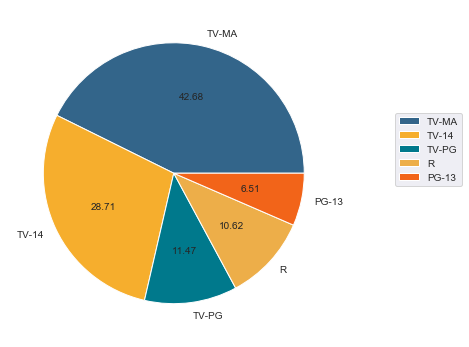

In [185]:
z = df.groupby(['rating']).size().reset_index(name='counts').sort_values("counts",ascending=False).head(5)
plt.figure(figsize=(12,6))

color = ("#33658A","#F6AE2D","#00798C","#EDAE49","#F26419")
plt.pie(x = z['counts'],autopct='%.2f',colors=color,labels=z.rating)
plt.legend(z.rating,bbox_to_anchor=(0.9, 0.2, 0.5, 0.5))

plt.show()


## Analyzing the top 5 countries produce Netflix movie
From below horizontal bar graph we can see that :
#### 1. United States produced higher movie 
#### 2. India is the second country produced higher Movie

In [135]:
def BarhGraphAnnotation(variable1,variable2):
    for i, count in enumerate(variable1):
        plt.annotate(count,(count+20,variable2[i]),size=12,weight='light')
    return ''


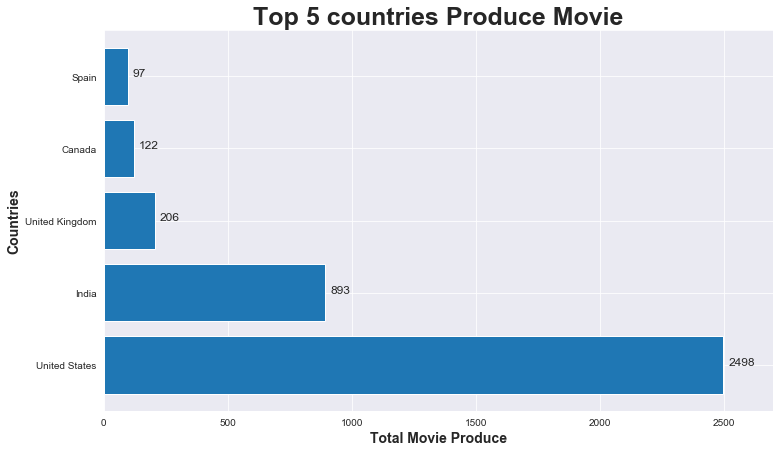

In [136]:
top_5_country = df.loc[df["type"]=="Movie"][["country",'type']].groupby("country").count()
top_5_country = top_5_country.sort_values(top_5_country.columns[0],ascending=False).rename(columns={'type':'Total Movie'}).head(5)
country = list(top_5_country.index)

sns.set_style('darkgrid')
plt.figure(figsize=(12,7))

BarhGraphAnnotation(top_5_country['Total Movie'],country)
    

plt.barh(y=top_5_country.index,width='Total Movie',data=top_5_country,animated=True)
plt.xlim(0,2700)
plt.title('Top 5 countries Produce Movie',fontdict={'family':'Arial','weight':'bold','size':25})
plt.ylabel("Countries",fontdict={'family':'Arial','weight':'bold','size':14})
plt.xlabel("Total Movie Produce",fontdict={'family':'Arial','weight':'bold','size':14})
    
plt.show()

## Analyzing the top 10 countries produce Netflix movie
From below horizontal bar graph we can see that :
#### 1. United States produced higher movie 
#### 2. India is the second country produced higher Movie

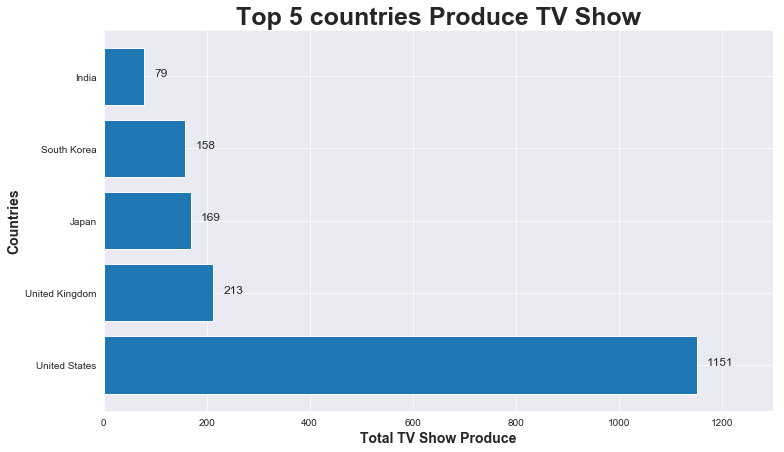

In [137]:
top_5_countries = df.loc[df["type"]=="TV Show"][["country",'type']].groupby("country").count()
top_5_countries = top_5_countries.sort_values(top_5_countries.columns[0],ascending=False)
top_5_countries = top_5_countries.rename(columns={'type':'Total TV Shows'}).head(5)
country = list(top_5_countries.index)

plt.figure(figsize=(12,7))
color = ('#5974A4','#5F9E6E','#B55D60')

plt.barh(y=top_5_countries.index, width='Total TV Shows',data=top_5_countries)

BarhGraphAnnotation(top_5_countries['Total TV Shows'],country)


plt.xlim(0,1300)
plt.title('Top 5 countries Produce TV Show',fontdict={'family':'Arial','weight':'bold','size':25})
plt.ylabel("Countries",fontdict={'family':'Arial','weight':'bold','size':14})
plt.xlabel("Total TV Show Produce",fontdict={'family':'Arial','weight':'bold','size':14})
    
plt.show()

## Analyzing Content on Netflix:
Analyzing trend on production over the years on Netflix
This to compare Movie and TV shows data to see the trend over the time.

#### 1. Movie production are increasing than Tv Shows 
#### 2. Between 2014 to 2019 there are higher increase in movie production while decrease in movie production from 2020


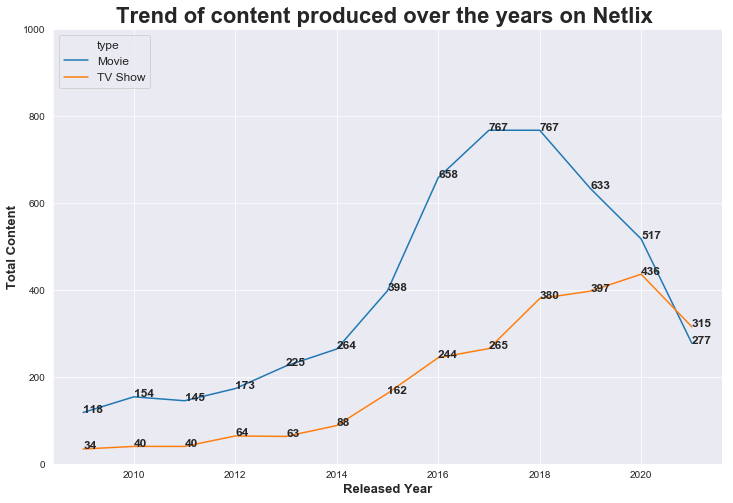

In [138]:
production = df[['type','release_year']].rename(columns = {"release_year":"Released Year"})
production = production.groupby(['Released Year','type']).size().reset_index(name=("Total Content"))
production = production[production['Released Year']>= 2009]
year = list(production["Released Year"].values)

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=production,x = 'Released Year', y = 'Total Content',hue="type")

for i, count in enumerate(production['Total Content']):
    plt.annotate(count,(year[i],count),size=12,weight='bold')
    
plt.ylim((0,1000))
plt.legend(loc='upper left',fontsize='large')    
plt.title('Trend of content produced over the years on Netlix ',fontdict={'family':'Arial','weight':'bold','size':22})
plt.ylabel("Total Content",fontdict={'family':'Arial','weight':'bold','size':13})
plt.xlabel("Released Year",fontdict={'family':'Arial','weight':'bold','size':13})
    
plt.show()


### director feature/variable categorized all netflix production(Movie & TV Shows) director
### Lets Analyse it to see directors that have much impact on netflix production
Observation from below graph:
    
1. Rajiv Chilaka
2. Raul Campos
3. jan shuter
4. shuha kadav
5. marcus Raboy


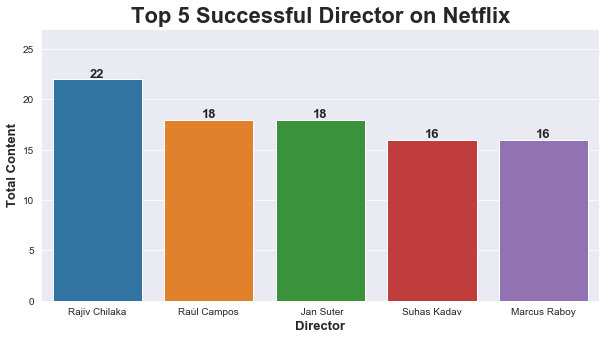

In [172]:

director = df[df['director'] != 'Director not Specified']['director'].str.split(',',expand=True).stack()
director = pd.DataFrame(director,columns=['Director'])
director = director.groupby('Director').size().reset_index(name='Total Content')
director = director.sort_values('Total Content',ascending=False).head()

director_list = list(director.Director)

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Director',y='Total Content',data=director)

BarGraphAnnotation(ax)

plt.title('Top 5 Successful Director on Netflix',fontdict={'family':'Arial','weight':'bold','size':22})
plt.xlabel("Director",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylabel("Total Content",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylim(0,27)
    
plt.show()


### Cast feature/variable categorized all the  netflix production(Movie & TV Shows) actor.
### Lets Analyse it to see directors that have much impact on netflix production
Observation from below graph:
    
1. Anupam kheh
2. Rupa Bhimani
3. Takahiro sakurai
4. Julie Tejwani
5. Om puri


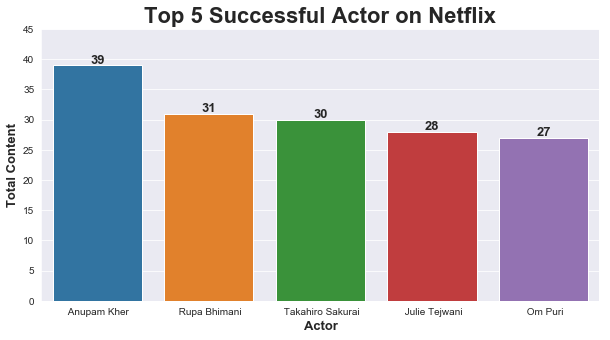

In [171]:
cast = df[df['cast'] != 'Actor not Specified']['cast'].str.split(',',expand=True).stack()
cast = pd.DataFrame(cast,columns=['Actor'])
cast = cast.groupby(['Actor']).size().reset_index(name='Total Content')
cast = cast.sort_values('Total Content',ascending=False).head()
cast_list = list(cast.Actor)

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Actor',y='Total Content',data=cast)

BarGraphAnnotation(ax)
plt.ylim(0,45)
plt.title('Top 5 Successful Actor on Netflix',fontdict={'family':'Arial','weight':'bold','size':22})
plt.xlabel("Actor",fontdict={'family':'Arial','weight':'bold','size':13})
plt.ylabel("Total Content",fontdict={'family':'Arial','weight':'bold','size':13})
    
plt.show()
